In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import torch

from torch.autograd import grad
from torchviz import make_dot

from pideq.deq.model import get_implicit

In [18]:
batch_size = 5

n_in = 2
n_out = 3
n_states = 4

# test functional implicit model implementation
implicit = get_implicit(forward_max_steps=500, forward_eps=1e-6,
                        backward_max_steps=500, backward_eps=1e-6)

x = torch.rand(batch_size, n_in).double()
x.requires_grad_()
z0 = torch.zeros(batch_size, n_states).double()

A = torch.nn.Linear(n_states, n_states).double()
B = torch.nn.Linear(n_in, n_states).double()

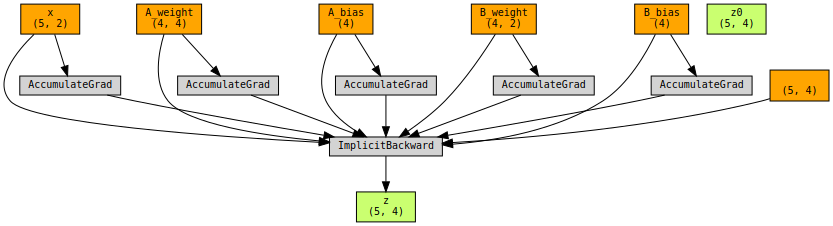

In [19]:
z = implicit(x, z0, A.weight, A.bias, B.weight, B.bias)

make_dot((x, z0, A.weight, A.bias, B.weight, B.bias, z), {'x': x, 'z0': z0, 'A_weight': A.weight, 'A_bias': A.bias, 'B_weight': B.weight, 'B_bias': B.bias, 'z': z})

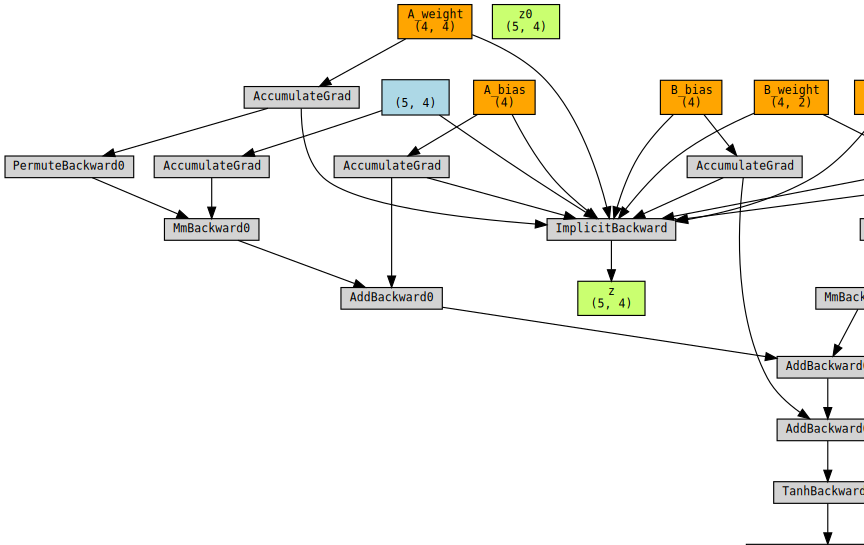

In [20]:
z = implicit(x, z0, A.weight, A.bias, B.weight, B.bias)
grad_z = grad(z, x, torch.ones_like(z), retain_graph=True, create_graph=True)[0]
make_dot((x, z0, A.weight, A.bias, B.weight, B.bias, z, grad_z), {'x': x, 'z0': z0, 'A_weight': A.weight, 'A_bias': A.bias, 'B_weight': B.weight, 'B_bias': B.bias, 'z': z, 'grad_z': grad_z})